# Study on Water Rockets

## Introduction

The aim of the code is to visualize theoratical predictions of the height of the water rocket depending on time and initial volume of water inside the rocket. The relation between displacement and those two parameters depend on the type of air expansion process assumed, whether it is isothermal or adiabatic, and is given by these differential equations.

* Eqaution for isothermal process before burnout:

$$ \frac{ds}{dt} = -gt+\sqrt{\frac{2P_0 \left( V_r - V_w \right)}{\rho \left( \frac{3}{2} S \sqrt{\frac{2P_0\left( V_r - V_w \right) }{\rho}}t+\frac{3}{2}\left( \frac{2}{3}\left( V_r - V_w \right) \right)^{\frac{3}{2}}\right) ^{\frac{2}{3}}}}\times\nonumber\\
\times \ln\Bigg|{\frac{m_r + \rho V_w}{ m_r+\rho \left(V_r - \left( \frac{3}{2} S \sqrt{\frac{2P_0 \left( V_r - V_w \right)}{\rho}}t+\frac{3}{2}\left( \frac{2}{3}\left( V_r - V_w \right) \right)^{\frac{3}{2}}\right) ^{\frac{2}{3}} \right)}}\Bigg| $$

* Eqaution for isothermal process after burnout:

$$ \frac{ds}{dt} = -gt + \sqrt{\frac{2P_0 \left( V_r - V_w \right)}{\rho V_r}} \ln{\bigg| \frac{m_r+\rho V_w}{m_r} \bigg|} $$

* Eqaution for adiabatic process before burnout:

$$ \frac{ds}{dt} = -gt+ \sqrt{\frac{2P_0 \left( V_r - V_w \right)^{\gamma}}{\rho \left( \frac{3}{2} S \sqrt{\frac{2P_0\left( V_r - V_w \right) }{\rho}}t+\frac{17}{10}\left( \frac{2}{3}\left( V_r - V_w \right) \right)^{\frac{3}{10}}\right) ^{\frac{10 \gamma}{17}}}}\nonumber\\
\times \ln\Bigg|{\frac{m_r + \rho V_w}{ m_r+\rho \left(V_r - \left( \frac{17}{10} S \sqrt{\frac{2P_0 \left( V_r - V_w \right)}{\rho}}t+\frac{17}{10}\left( \frac{10}{17}\left( V_r - V_w \right) \right)^{\frac{17}{10}}\right) ^{\frac{10}{17}} \right)}}\Bigg| $$

* Eqaution for adiabatic process after burnout:

$$ \frac{ds}{dt} = -gt + \sqrt{\frac{2P_0 \left( V_r - V_w \right)^{\gamma}}{\rho V_r^{\gamma}}} \ln{\bigg| \frac{m_r+\rho V_w}{m_r} \bigg|} $$

(see the `study_on_water_rockets.pdf` file for derivation and explenation of terms)
In the numerical solution of the equations the Euler's method was used.

First of all, the necessary libraries are imported

In [1]:
#Import libraries
import numpy as np
import math
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

Then, the simulation parameters are defined as follows:

In [46]:
# Define parameters:
g = 9.81
p0 = 137895.15
r = 997
dh = 0.022
dr = 0.1
mr = 0.1268727
T = 293
R = 8.31
vr = 0.00208
k = 1.4

Next, the height, time and initial volume of water axes are defined.

In [88]:
# Define axes and initial conditions
x0 = 0
y0 = 0.0004
z0 = 0
xf = 1.5
yf = 0.0012
n = 501
m = 501
deltax = (xf - x0) / (n - 1)
deltay = (yf - y0) / (m - 1)
x = np.linspace(x0 , xf, n)
y = np.linspace(y0, yf, m)
Y, X = np.meshgrid(y, x)
z_i = np.zeros([n, m])
z_a = np.zeros([n, m])
z_i[0, 0] = z0
z_a[0, 0] = z0

These previous parts of the code are the same for both isothermal and adiabatic processes.

Let me first focus on isothermal process, as it is a bit simpler. The whole differential equation was splitted into many, shorter equations for readability

In [107]:
for i in range (1, n):
 for j in range(1, m):

    # Define heling equations
    v0 = vr - y[j]
    a = v0 * p0
    u_a = math.sqrt((2 * a) / r)
    s = ((1 / 4) * math.pi * ((dh) ** 2))
    v = (3 / 2 * s * u_a * x[i-1] + 3/2 * (2 / 3 * v0) ** (3 / 2)) ** (2 / 3)
    u = math.sqrt((2 * a)/(r * v))
    uf = math.sqrt((2 * a) / (r * vr))
    m0 = mr + r * y[j]
    mf = mr + r * (vr - v)
    e = np.log(m0 / mf)
    ef = np.log(m0 / mr)
    
    #Final equation
    if vr > v:
        z_i[i,j] = deltax * (- g * x[i-1] + u * e) + z_i[i-1,j]

    else:
        # Final equation for displacement after burnout:
        z_i[i,j] = deltax * (- g * x[i-1] + uf * ef) + z_i[i-1,j]

C:\Users\Krzysiek\AppData\Local\Temp\ipykernel_60468\3686447548.py:14: RuntimeWarning: invalid value encountered in log
  e = np.log(m0 / mf)


Following lines of code are used for plotting the results.

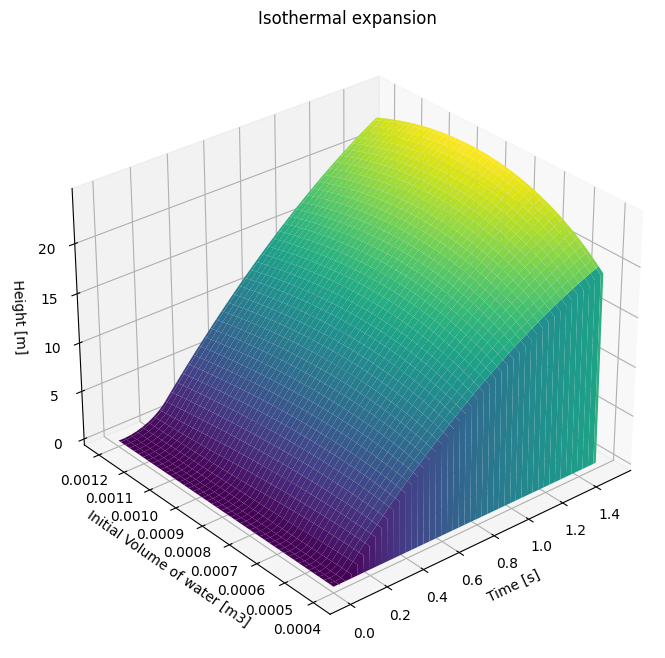

In [108]:
fig = plt.figure(figsize = (8, 8))
ax = plt.axes(projection="3d")
ax.set_title("Isothermal expansion")
ax.set_xlabel("Time [s]")
ax.set_ylabel("Initial Volume of water [m3]")
ax.set_zlabel("Height [m]")
surf = ax.plot_surface(X, Y, z_i, cmap='viridis')
ax.view_init(30, -130)
plt.show()

Let me intorduce the code used to simulate adiabaic expansion

In [109]:
for i in range (1, n):
 for j in range(1, m):

    #Define equations
    v0 = (vr - y[j])
    a = p0 * (v0) ** (k)
    u_a = np.sqrt((2 * a) / r)
    s = ((1 / 4) * math.pi * ((dh) ** 2))
    v = (17 / 10 * s * u_a * x[i-1] + 17 / 10 * (10 / 17 * v0) ** (17 / 10)) ** (10 / 17)
    u = np.sqrt((2 * a) / (r * (v) ** (k)))
    uf = np.sqrt((2 * a)/(r * (vr) ** (k)))
    m0 = mr + r * y[j]
    mf = mr + r * (vr - v)
    e = np.log(m0 / mf)
    ef = np.log(m0 / mr)
    if vr > v:
        # Final equation for displacement during acceleration:
        z_a[i, j] = deltax * (- g * x[i-1] + u * e ) + z_a[i-1, j]
    
    else:
        # Final equation for displacement after burnout:
        z_a[i, j] = deltax * (- g * x[i-1] + uf * ef) + z_a[i-1, j]



C:\Users\Krzysiek\AppData\Local\Temp\ipykernel_60468\937173455.py:14: RuntimeWarning: invalid value encountered in log
  e = np.log(m0 / mf)


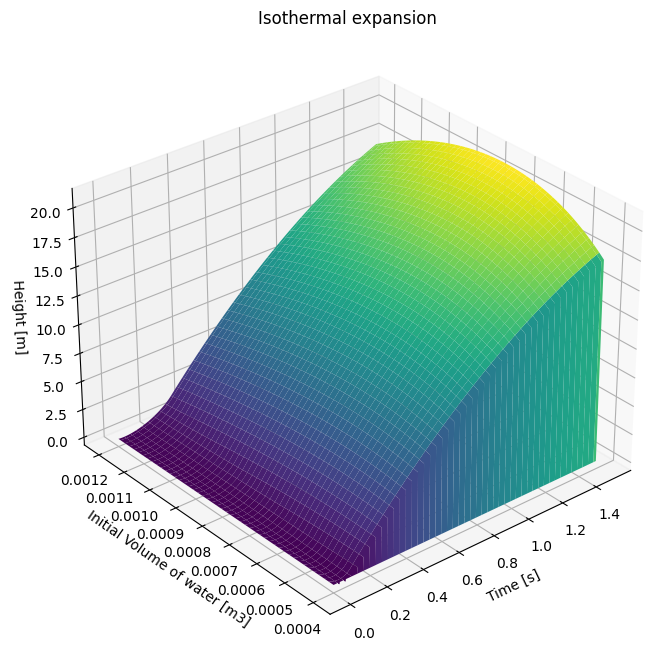

In [110]:
fig = plt.figure(figsize = (8, 8))
ax = plt.axes(projection="3d")
ax.set_title("Isothermal expansion")
ax.set_xlabel("Time [s]")
ax.set_ylabel("Initial Volume of water [m3]")
ax.set_zlabel("Height [m]")
surf = ax.plot_surface(X, Y, z, cmap='viridis')
ax.view_init(30, -130)
plt.show()

The two graphs look similar because the difference between the type of air expansion is really small in this scale

Now, let me plot experimental results

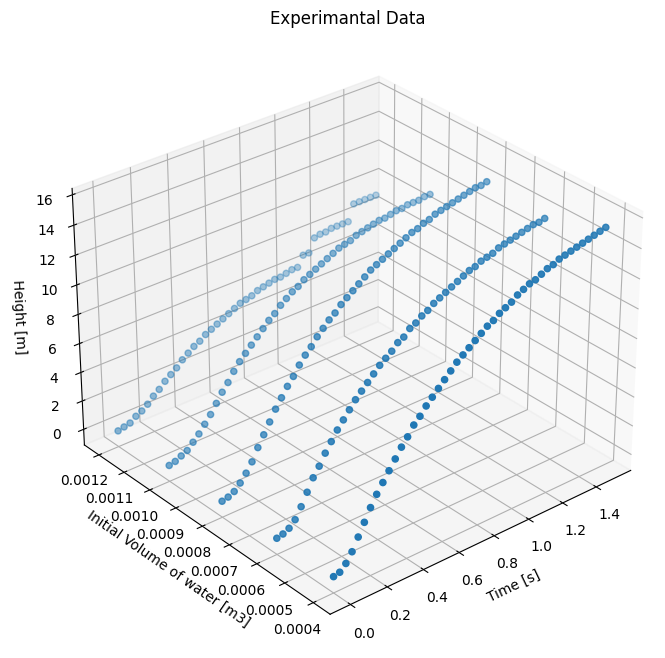

In [111]:
# Import experimental data
exp_data = arr = np.loadtxt("experimental_results.csv", delimiter=",", dtype=float)

# Defnine new axes mathing shape of experimental data
x_exp = np.linspace(x0 , xf, exp_data.shape[1])
y_exp = np.linspace(y0 , yf, exp_data.shape[0])
X_exp, Y_exp = np.meshgrid(x_exp, y_exp)

# Visualize the data
fig = plt.figure(figsize = (8, 8))
ax = plt.axes(projection="3d")
ax.set_title("Experimantal Data")
ax.set_xlabel("Time [s]")
ax.set_ylabel("Initial Volume of water [m3]")
ax.set_zlabel("Height [m]")
surf = ax.scatter(X_exp, Y_exp, exp_data, cmap='viridis')
ax.view_init(30, -130)
plt.show()


Comaparison of experimental and theoretical (both isothermal and adiabatic) results

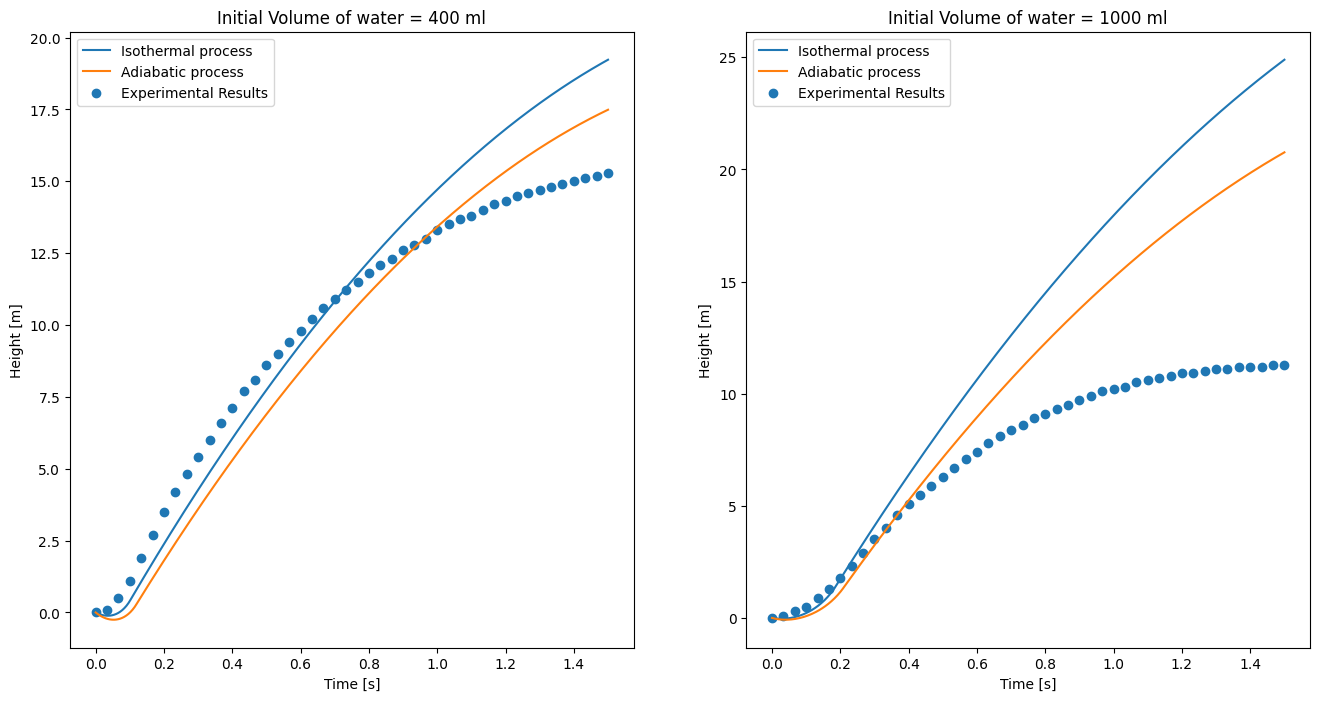

In [120]:
fig, ax = plt.subplots(1, 2, figsize=(16, 8))
ax[0].plot(x, z_i[:, 1], label = "Isothermal process")
ax[0].plot(x, z_a[:, 1], label = "Adiabatic process")
ax[0].scatter(x_exp, exp_data[0, :], label = "Experimental Results")
ax[0].set_xlabel("Time [s]")
ax[0].set_ylabel("Height [m]")
ax[0].set_title("Initial Volume of water = 400 ml")
ax[0].legend()
ax[1].plot(x, z_i[:, m // 5 * 3], label = "Isothermal process")
ax[1].plot(x, z_a[:, m // 5 * 3], label = "Adiabatic process")
ax[1].scatter(x_exp, exp_data[3, :], label = "Experimental Results")
ax[1].set_xlabel("Time [s]")
ax[1].set_ylabel("Height [m]")
ax[1].set_title("Initial Volume of water = 1000 ml")
ax[1].legend()
plt.show()